# Importing libraries

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading nltk corpus

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu

True

#  Loading the Amazon Review dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


# About the data set

**Source:** The dataset comprises Amazon reviews collected from GitHub.

**Content:** It contains textual reviews written by customers, along with corresponding sentiment labels indicating whether the sentiment expressed in the review is positive or negative.

**Purpose:** The dataset serves as a valuable resource for sentiment analysis tasks, enabling the exploration of customer opinions, preferences, and experiences across a wide range of products.

**Insights:** Analysis of this dataset facilitates the extraction of insights regarding customer satisfaction levels, product quality perceptions, and market trends.

**Applications:** The dataset can be utilized to inform business strategies, product improvements, and customer engagement initiatives based on the understanding of customer sentiments and preferences.
preferences.rences.

In [ ]:
type(df)

pandas.core.frame.DataFrame

# Checking for Null Values

In [ ]:
df.isna().sum()

reviewText    0
Positive      0
dtype: int64

# Creating a preprocess_text function

In [ ]:

def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]


    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text



# Applying the function df

In [ ]:
df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


# Word Cloud

In [ ]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 465.5 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.5 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud

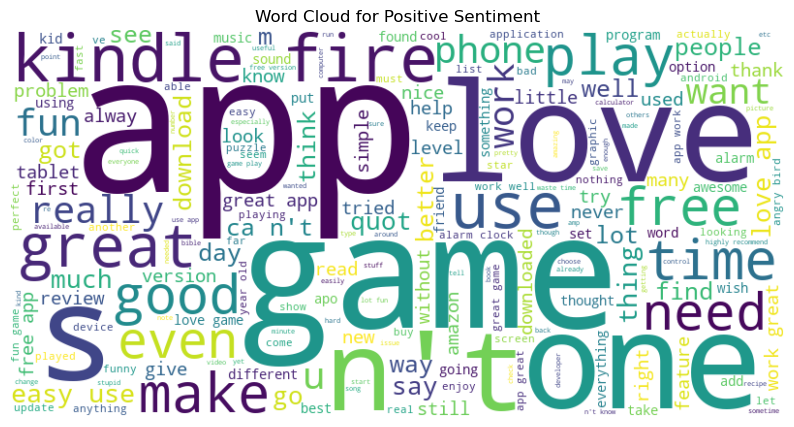

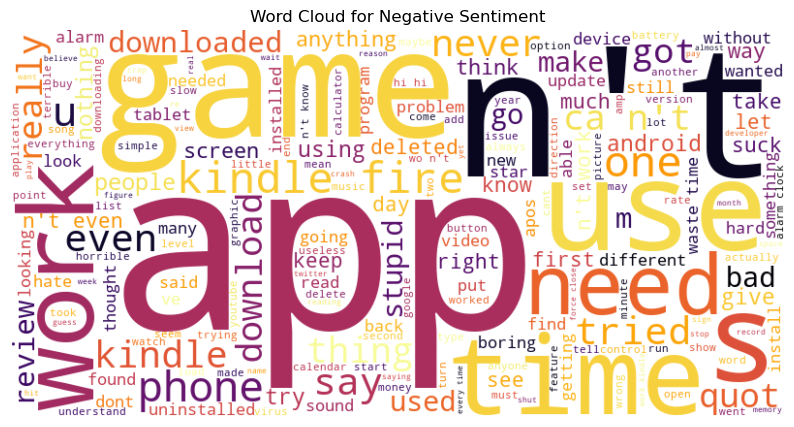

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with preprocessed text and sentiment

# Filter DataFrame for positive sentiment (sentiment == 1)
positive_text = ' '.join(df[df['sentiment'] == 1]['reviewText'])

#  word cloud for positive sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)

# Plot word cloud for positive sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

# Filter DataFrame for negative sentiment (sentiment == 0)
negative_text = ' '.join(df[df['sentiment'] == 0]['reviewText'])

# word cloud for negative sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(negative_text)

# Plot word cloud for negative sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()


# Initializing NLTK sentiment analyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# creating get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# applying get_sentiment function

df['sentiment'] = df['reviewText'].apply(get_sentiment)

df

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



# **Interpretation:**

1) **Precision:** The model correctly identifies around 66% of negative (less favorable) reviews and 80% of positive (favorable) reviews.
2) **Recall:** It captures approximately 24% of actual negative reviews and 96% of actual positive reviews.
3) **F1-score:** Strikes a balance between precision and recall, with scores of 0.35 for negative reviews and 0.87 for positive reviews.
4) **Accuracy:** Overall, the model correctly predicts sentiment for about 79% of the Amazon reviews.
5) **Macro avg:** The average precision, recall, and F1-score, without considering class imbalances, are 0.73, 0.60, and 0.61, respectively.
6) **Weighted avg:** Precision, recall, and F1-score, considering class imbalances, are 0.77, 0.79, and 0.75, respectively.


# **Key Learnings:**

**1. Text Data Preprocessing:**
   Acquired practical experience in preprocessing textual data, including tokenization, stop word removal, and lemmatization. Recognized the importance
   of data cleanliness and normalization in natural language processing tasks, ensuring the accuracy and reliability of subsequent analyses.

**2. Sentiment Analysis Techniques:**
   Explored sentiment analysis techniques using the NLTK library, gaining insights into classifying text sentiment as positive or negative. Understood
   the application of sentiment intensity analysis to assess the emotional tone of textual content, facilitating a deeper understanding of customer
   sentiment in reviews.

**3. Model Evaluation and Interpretation:**
   Developed proficiency in evaluating sentiment analysis models using performance metrics such as precision, recall, F1-score, and accuracy. Learned
   to interpret these metrics to assess the model's effectiveness and identify areas for improvement, enhancing analytical skills in model evaluation.

**4. Application in Real-World Context:**
   Applied sentiment analysis techniques to real-world data, specifically Amazon reviews, to understand customer sentiment towards products or
   services. Recognized the practical significance of sentiment analysis in deriving insights from textual data for business decision-making and
   customer satisfaction enhancement.